# Sklearn Lab

### Introduction

In this lesson, it's time to load up some data and begin training a model with sklearn.  Now, the pandas work will be done for you -- we'll cover that next -- but it's still good to become comfortable with training a model in sklearn.

### Loading our Data

Imagine that a coffee shop chain wants to learn more about it's stores.  It wants to learn what criteria made for high performing chains in the past so that it can replicate this in the future.  To get an initial idea, you decide to use a decision tree to learn what factors may be important.

In [23]:
import pandas as pd
df = pd.read_csv('./customer_data.csv', index_col = 0)
df.columns = ['nearby_competitors', 'years_open', 'borough', 'size', 'income']

In [24]:
df = df.replace(0, '< 1 mil')
df = df.replace(1, '> 1 mil')

In [25]:
df['nearby_competitors'] = df['nearby_competitors'].replace('Yes', 0)

In [26]:
df = df.replace('?', 3)

In [28]:
df['nearby_competitors'] = df['nearby_competitors'].replace('No', 5)

In [30]:
df = df.replace('Yes', 3)
df = df.replace('No', 2)

In [33]:
df = df.astype('category')

In [37]:
df_data = df.apply(lambda x: x.cat.codes)

In [51]:
df_data

,nearby_competitors,years_open,borough,size,income
0,1,1,1,1,0
1,0,1,0,1,0
2,1,0,0,1,1
3,2,0,2,2,1
4,1,0,2,0,1
5,0,0,1,2,0
6,0,0,2,2,0
7,0,1,0,0,0


In [42]:
X = df_data.iloc[:, 0:-1]

In [43]:
y = df_data.iloc[:, -1]

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
model = DecisionTreeClassifier()
model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

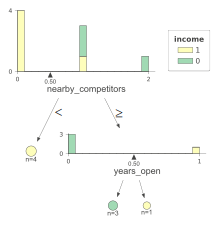

In [54]:
from dtreeviz.trees import dtreeviz
viz_1 = dtreeviz(model,
               X.to_numpy(),
               df_data['income'],
               target_name='income',
               feature_names=X.columns,
               class_names=[1, 0]
              )
              
viz_1   